<a href="https://colab.research.google.com/github/RaihanAminRana/EEE_312_DeepFake/blob/CollabNotebooks/EEE_312_DeepFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**EEE 312 - Deep Fake**

Using XGB Classifier


Importing


In [18]:
#!pip install kaggle
#from google.colab import drive
#drive.mount('/content/drive')
#!mkdir ~/.kaggle
#!cp /content/drive/MyDrive/ColabNotebooks/KaggleAPICredentials/kaggle.json ~/.kaggle/kaggle.json
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets download -d raihanaminrana/train-data-large1
#! kaggle datasets download -d raihanaminrana/test-dataset
#! kaggle datasets download -d raihanaminrana/train-data-short


In [19]:
#Beta parameters
import numpy as np
import scipy.fft
import statistics as stat

#Dataframe /imgae visualization
import pandas as pd
import matplotlib.pyplot as plt

#Image directories
import os
import glob
import cv2
from torch.utils.data import random_split

#Data batch making
import torch
from torch.utils.data import Dataset, DataLoader


#XceptionNet
#import torch
import torch.nn as nn
import torch.nn.functional as F

#training
import torch.optim as optim

dsd

In [20]:
! pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 11.4 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [21]:
import albumentations as A

['/content/Train-Data-Large1/1-Fake', '/content/Train-Data-Large1/0-Real']
1-Fake
0-Real
90000
81000 9000


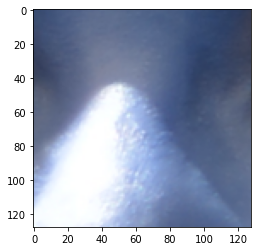

In [26]:
class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "/content/Train-Data-Large1"
        file_list = glob.glob(self.imgs_path +"/*")
        print(file_list)
        
        self.class_map = {"0-Real" : 0, "1-Fake": 1}
        self.img_dim = (128, 128)
        
        self.data = []
                
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            print(class_name)
            for img_path in glob.iglob(class_path +"/**/*"):
                Original_Image = cv2.imread(img_path)
                Original_Image = np.array(Original_Image)
                
                AUG = [A.CenterCrop(128,128), A.HorizontalFlip]
                
                ###Original Image
                Image = cv2.resize( Original_Image, self.img_dim)
                Image_gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
                #plt.imshow(Image_gray)
                beta_tensor = self.get_beta_params(Image_gray)
                self.data.append([beta_tensor, self.class_map[class_name]])
                
                
                ###JPEG Compression-1
                
                
                
                ####JPEG Compression -50
                
                
                
                
                
                
                ####JPEG Compression - 100
                
                
                
                
                
                
                ####Gaussian Filter - 3by3
                
                
                
                
                ####Gaussian Filter - 9by9
                
                
                
                ####Gaussian Filter - 15by15
                
                
                
                
                ####Flipped left to right
                transform_cc = AUG[1](p=1)
                #A.Compose([A.CenterCrop(width=128, height=128),])
                flipped_Images = transform_cc(image = Original_Image)
                flipped_Image = cv2.resize(flipped_Images["image"], self.img_dim)
                Image_gray = cv2.cvtColor(flipped_Image, cv2.COLOR_BGR2GRAY)
                beta_tensor = self.get_beta_params(Image_gray)
                self.data.append([beta_tensor, self.class_map[class_name]])
                
                
                
                ####Flipped right to left
                
                
                
                ###flipped Up and Down Image
                flipped_Image = np.flipud( Original_Image)
                flipped_Image = cv2.resize(flipped_Image, self.img_dim)
                Image_gray = cv2.cvtColor(flipped_Image, cv2.COLOR_BGR2GRAY)
                #plt.imshow(Image_gray)
                beta_tensor = self.get_beta_params(Image_gray)
                self.data.append([beta_tensor, self.class_map[class_name]])
                
                
                
                ####45 degree rotation
                
                
                
                
                ###90 degree Rotated Image, Clockwise
                Rotate90_Image = np.rot90(Original_Image, k=1, axes=(0, 1))
                #plt.imshow(Rotate90_Image)
                Rotate90_Image = cv2.resize(Rotate90_Image, self.img_dim)
                Image_gray = cv2.cvtColor(Rotate90_Image, cv2.COLOR_BGR2GRAY)
                beta_tensor = self.get_beta_params(Image_gray)
                self.data.append([beta_tensor, self.class_map[class_name]])
                
                
                
                ###135 degree rotation
                
                
                
                ###180 degree rotation
                Rotate180_Image = np.rot90(Original_Image, k=2, axes=(0, 1))
                Rotate180_Image = cv2.resize(Rotate180_Image, self.img_dim)
                Image_gray = cv2.cvtColor(Rotate180_Image, cv2.COLOR_BGR2GRAY)
                beta_tensor = self.get_beta_params(Image_gray)
                self.data.append([beta_tensor, self.class_map[class_name]])
                
                
                
                
                ###Scaling  -50%
                
                
                
                
                ####Scaling +50%
                
                
                ####Center Crop
                
                transform_cc = AUG[0]
                #A.Compose([A.CenterCrop(width=128, height=128),])
                Center_Crop = transform_cc(image = Original_Image)
                plt.imshow(Center_Crop["image"])
                Cropped_Image = cv2.resize(Center_Crop["image"], self.img_dim)
                Image_gray = cv2.cvtColor(Cropped_Image, cv2.COLOR_BGR2GRAY)
                beta_tensor = self.get_beta_params(Image_gray)
                self.data.append([beta_tensor, self.class_map[class_name]])
      
    def get_beta_params(self, Image):
        beta = np.zeros((8,8))
        block_m = 8  # rows in block
        block_n = 8  # cols in block
        B = Image.reshape((-1, block_m, Image.shape[1]//block_n, block_n))  
        betas = B.transpose((0,2,1,3))
        
        
        ####Calculating DCT coefficients of nn-overlapping blocks
        for i in range(8):
            for j in range(8):
                betas[i,j] = scipy.fft.dctn(betas[i,j])
        
        
        ###Calculating Beta Coefficients
        for i in range(8):
            for j in range(8):
                beta[i,j] = (1/np.sqrt(2))*np.std(betas[:,:,i,j].flatten())
       
        ####Ordering in ZigZag Order
        B = []
        for i in range(7, -8, -1):
            if i %2 == 0:
                for  l in np.fliplr(beta).diagonal(i):
                    B.append(l)
            else: 
                for m in np.flip(np.fliplr(beta).diagonal(i)):
                    B.append(m)
        beta = np.array(B).reshape(8,8) 
        
        return beta 

    def __len__(self):
        return len(self.data)


    def __getitem__(self, idx):
        beta_tensor, label = self.data[idx]  
        return beta_tensor.flatten(), label
    
if __name__ == "__main__":
    dataset = CustomDataset() 
    print(len(dataset))
    
    len_dataset = len(dataset)
    len_train = int(0.9*len_dataset)
    len_valid = len_dataset -len_train
    print(len_train, len_valid)
    
    train_dataset, valid_dataset = random_split(dataset, [len_train, len_valid]) 
    
    #train_ds = DataLoader(train_dataset, batch_size=64, shuffle=True)
    #valid_ds = DataLoader(valid_dataset, batch_size=64, shuffle=True)
    
    X_train = [i[0] for i in train_dataset]
    Y_train = [i[1] for i in train_dataset]
    
    X_valid = [i[0] for i in valid_dataset]
    Y_valid = [i[1] for i in valid_dataset]
    #for beta, labels in train_ds:
        #print("Batch of betas has shape: ",beta.shape)
        #print("Batch of labels has shape: ", labels.shape)

In [56]:
#test dataset
class CustomTestDataset(Dataset):
    def __init__(self):
        self.imgs_path = '/content/Test-Dataset/test-image/'
        self.data = []
        img_id_label = np.loadtxt("/content/Test-Dataset/test-label.txt", dtype='str',delimiter=" ")
        for i in range(len(img_id_label)):
            self.data.append([self.imgs_path+img_id_label[i][0], int(img_id_label[i][1])])
        
        print(self.data[5000])
        
        self.img_dim = (128, 128)
        
    def __len__(self):
        return len(self.data)
    
    def get_beta_params(self,Image):
        beta = np.zeros((8,8))
        block_m = 8  # rows in block
        block_n = 8  # cols in block
        B = Image.reshape((-1, block_m, Image.shape[1]//block_n, block_n))  
        betas = B.transpose((0,2,1,3))
        
        for i in range(8):
            for j in range(8):
                betas[i,j] = scipy.fft.dctn(betas[i,j])
                
        for i in range(8):
            for j in range(8):
                beta[i,j] = (1/np.sqrt(2))*np.std(betas[:,:,i,j].flatten())
        beta[0,0] = 0 ###DC coefficients
        
        
        ####Ordering in ZigZag Order
        B = []
        for i in range(7, -8, -1):
            if i %2 == 0:
                for  l in np.fliplr(beta).diagonal(i):
                    B.append(l)
            else: 
                for m in np.flip(np.fliplr(beta).diagonal(i)):
                    B.append(m)
        beta = np.array(B).reshape(8,8) 
        
        return beta 
    
    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_dim)
        #img_tensor = torch.from_numpy(img)
        #img_tensor = img_tensor.permute(2, 0, 1)
        
        
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        beta_tensor = self.get_beta_params(img_gray)
        #beta_tensor = torch.from_numpy(beta_tensor)
        beta_tensor = beta_tensor.reshape(1,8,8)
        return beta_tensor.flatten(), label
    
#if __name__ == "__main__":
test_dataset = CustomTestDataset()
len_dataset = len(test_dataset)
print(len_dataset)

#test_ds = DataLoader(test_dataset, batch_size=64, shuffle=False)
X_test = [i[0] for i in test_dataset]
Y_test = [i[1] for i in test_dataset]

['/content/Test-Dataset/test-image/5000.jpg', 1]
7000


In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
learning_rate = 1.6

gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, Y_train)
#max_features=2, 
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_valid, Y_valid)))
print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

Learning rate:  1.6
Accuracy score (training): 0.768
Accuracy score (validation): 0.714
Accuracy score (Test): 0.603


In [58]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(np.array(X_train), np.array(Y_train))

print("Accuracy score (training): {0:.3f}".format(xgb_clf.score(X_train, Y_train)))
print("Accuracy score (validation): {0:.3f}".format(xgb_clf.score(X_valid, Y_valid)))
print("Accuracy score (Test): {0:.3f}".format(xgb_clf.score(X_test, Y_test)))

Accuracy score (training): 0.742
Accuracy score (validation): 0.731
Accuracy score (Test): 0.400
